# 统计图像尺寸、比例分布

同济子豪兄 https://space.bilibili.com/1900783

2022-8-1

## 导入工具包

In [30]:
import os
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

## 指定数据集路径

In [42]:
# 指定数据集路径
dataset_path = r'E:\MV-Code\Datasets\archive\SR-Base_datasets\val'
os.chdir(dataset_path)
os.listdir()

['parasitized', 'uninfected', '图像尺寸分布.pdf']

In [39]:
df = pd.DataFrame()
for fruit in tqdm(os.listdir()): # 遍历每个类别    
    os.chdir(fruit)
    for file in os.listdir(): # 遍历每张图像
        try:
            img = cv2.imread(file)
            df = df.append({'类别':fruit, '文件名':file, '图像宽':img.shape[1], '图像高':img.shape[0]}, ignore_index=True)
        except:
            print(os.path.join(fruit, file), '读取错误')
    os.chdir('../')
os.chdir('../')

100%|██████████| 2/2 [00:49<00:00, 24.65s/it]


            类别                                                文件名  图像宽  图像高
0  parasitized  C100P61ThinF_IMG_20150918_144104_cell_162_RCAN...  284  296
1  parasitized  C100P61ThinF_IMG_20150918_144104_cell_164_RCAN...  278  302
2  parasitized  C100P61ThinF_IMG_20150918_144104_cell_165_RCAN...  290  308
3  parasitized  C100P61ThinF_IMG_20150918_144104_cell_170_RCAN...  248  296
4  parasitized  C100P61ThinF_IMG_20150918_144348_cell_138_RCAN...  308  308


In [54]:
import os
import cv2
import pandas as pd
from tqdm import tqdm

# 指定数据集路径
dataset_path = r'E:\MV-Code\Datasets\archive\SR-Base_datasets\train'
dataframes = []  # 存储每个图像信息的 DataFrame 列表

# 遍历每个类别
for fruit in tqdm(os.listdir(dataset_path)):
    fruit_path = os.path.join(dataset_path, fruit)
    
    # 确保是文件夹
    if os.path.isdir(fruit_path):
        # 遍历每张图像
        for file in os.listdir(fruit_path):
            file_path = os.path.join(fruit_path, file)
            try:
                img = cv2.imread(file_path)
                if img is not None:
                    # 创建一个包含当前图像信息的 DataFrame
                    df = pd.DataFrame({'类别': [fruit], '文件名': [file], '图像宽': [img.shape[1]], '图像高': [img.shape[0]]})
                    dataframes.append(df)
                else:
                    print(file_path, '读取错误 - 图像为None')
            except Exception as e:
                print(file_path, '读取错误 - 异常:', e)

# 使用 concat 合并所有 DataFrame
df = pd.concat(dataframes, ignore_index=True)

# 查看 DataFrame
print(df.head())


100%|██████████| 2/2 [00:51<00:00, 25.59s/it]


            类别                                                文件名  图像宽  图像高
0  parasitized  C100P61ThinF_IMG_20150918_144104_cell_162_RCAN...  284  296
1  parasitized  C100P61ThinF_IMG_20150918_144104_cell_164_RCAN...  278  302
2  parasitized  C100P61ThinF_IMG_20150918_144104_cell_165_RCAN...  290  308
3  parasitized  C100P61ThinF_IMG_20150918_144104_cell_170_RCAN...  248  296
4  parasitized  C100P61ThinF_IMG_20150918_144348_cell_138_RCAN...  308  308


In [56]:
df

,类别,文件名,图像宽,图像高
0,parasitized,C100P61ThinF_IMG_20150918_144104_cell_162_RCAN...,284,296
1,parasitized,C100P61ThinF_IMG_20150918_144104_cell_164_RCAN...,278,302
2,parasitized,C100P61ThinF_IMG_20150918_144104_cell_165_RCAN...,290,308
3,parasitized,C100P61ThinF_IMG_20150918_144104_cell_170_RCAN...,248,296
4,parasitized,C100P61ThinF_IMG_20150918_144348_cell_138_RCAN...,308,308
...,...,...,...,...
19285,uninfected,C99P60ThinF_IMG_20150918_142128_cell_11_RCAN_B...,290,332
19286,uninfected,C99P60ThinF_IMG_20150918_142128_cell_45_RCAN_B...,308,248
19287,uninfected,C99P60ThinF_IMG_20150918_142128_cell_52_RCAN_B...,284,284
19288,uninfected,C99P60ThinF_IMG_20150918_142128_cell_53_RCAN_B...,290,296


## 可视化图像尺寸分布

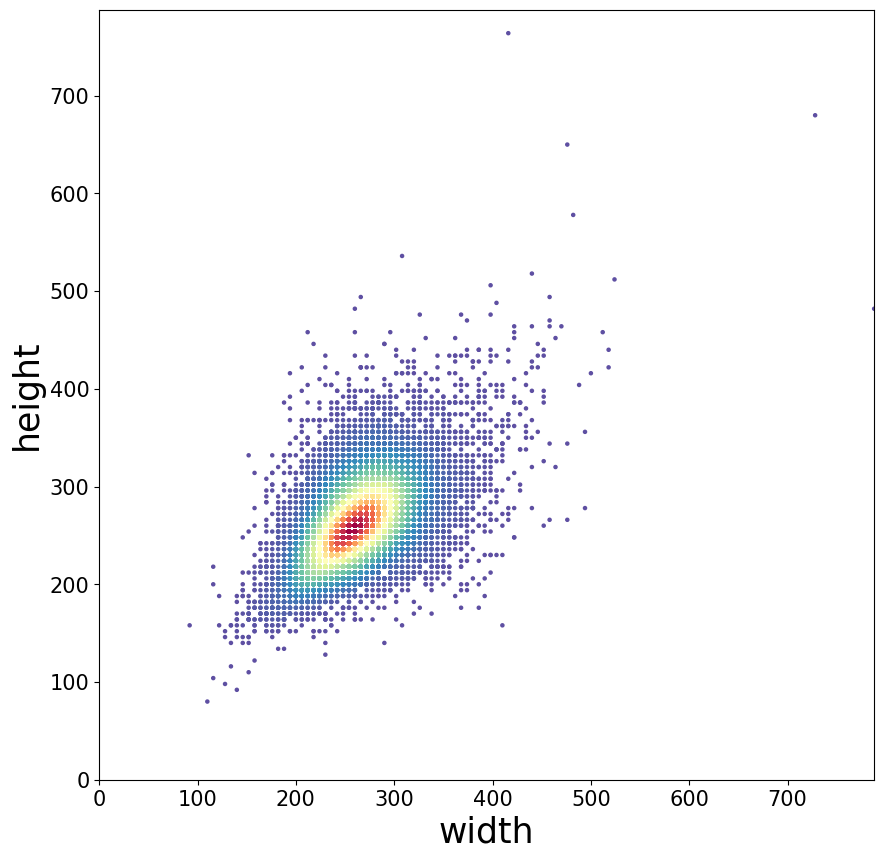

In [57]:
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm

x = df['图像宽']
y = df['图像高']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

plt.figure(figsize=(10,10))
# plt.figure(figsize=(12,12))
plt.scatter(x, y, c=z,  s=5, cmap='Spectral_r')
# plt.colorbar()
# plt.xticks([])
# plt.yticks([])

plt.tick_params(labelsize=15)

xy_max = max(max(df['图像宽']), max(df['图像高']))
plt.xlim(xmin=0, xmax=xy_max)
plt.ylim(ymin=0, ymax=xy_max)

plt.ylabel('height', fontsize=25)
plt.xlabel('width', fontsize=25)

plt.savefig('图像尺寸分布.pdf', dpi=120, bbox_inches='tight')

plt.show()